<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tic-Toc-Toe-environment" data-toc-modified-id="Tic-Toc-Toe-environment-1">Tic Toc Toe environment</a></span><ul class="toc-item"><li><span><a href="#Initialization-and-attributes" data-toc-modified-id="Initialization-and-attributes-1.1">Initialization and attributes</a></span></li><li><span><a href="#Taking-actions" data-toc-modified-id="Taking-actions-1.2">Taking actions</a></span></li><li><span><a href="#Reward" data-toc-modified-id="Reward-1.3">Reward</a></span></li></ul></li><li><span><a href="#Optimal-policy-for-Tic-Toc-Toe-environment" data-toc-modified-id="Optimal-policy-for-Tic-Toc-Toe-environment-2">Optimal policy for Tic Toc Toe environment</a></span><ul class="toc-item"><li><span><a href="#An-example-of-optimal-player-playing-against-random-player" data-toc-modified-id="An-example-of-optimal-player-playing-against-random-player-2.1">An example of optimal player playing against random player</a></span></li><li><span><a href="#An-example-of-optimal-player-playing-against-optimal-player" data-toc-modified-id="An-example-of-optimal-player-playing-against-optimal-player-2.2">An example of optimal player playing against optimal player</a></span></li></ul></li><li><span><a href="#Performance-measures" data-toc-modified-id="Performance-measures-3">Performance measures</a></span></li><li><span><a href="#2-TicTacToe-with-DQN" data-toc-modified-id="2-TicTacToe-with-DQN-4">2 TicTacToe with DQN</a></span><ul class="toc-item"><li><span><a href="#2.0-Implementation-details" data-toc-modified-id="2.0-Implementation-details-4.1">2.0 Implementation details</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-4.1.1">Setup</a></span></li><li><span><a href="#Utility" data-toc-modified-id="Utility-4.1.2">Utility</a></span></li><li><span><a href="#Replay-memory" data-toc-modified-id="Replay-memory-4.1.3">Replay memory</a></span></li><li><span><a href="#Illegal-moves-reward-(TODO)" data-toc-modified-id="Illegal-moves-reward-(TODO)-4.1.4">Illegal moves reward (TODO)</a></span></li><li><span><a href="#DQN-algorithm" data-toc-modified-id="DQN-algorithm-4.1.5">DQN algorithm</a></span></li></ul></li><li><span><a href="#2.1-Learning-from-experts" data-toc-modified-id="2.1-Learning-from-experts-4.2">2.1 Learning from experts</a></span><ul class="toc-item"><li><span><a href="#Q11-Standard-training-with-fixed--$\epsilon$" data-toc-modified-id="Q11-Standard-training-with-fixed--$\epsilon$-4.2.1">Q11 Standard training with fixed  $\epsilon$</a></span></li><li><span><a href="#Q12-Training-without-the-replay-buffer-and-with-a-batch-size-of-1" data-toc-modified-id="Q12-Training-without-the-replay-buffer-and-with-a-batch-size-of-1-4.2.2">Q12 Training without the replay buffer and with a batch size of 1</a></span></li><li><span><a href="#Q13-Training-with-decreasing-$\epsilon$-given-different-values-of-$n*$" data-toc-modified-id="Q13-Training-with-decreasing-$\epsilon$-given-different-values-of-$n*$-4.2.3">Q13 Training with decreasing $\epsilon$ given different values of $n*$</a></span></li><li><span><a href="#Q14-Visualizing-$M_{opt}$-and-$M_{rand}$-over-time" data-toc-modified-id="Q14-Visualizing-$M_{opt}$-and-$M_{rand}$-over-time-4.2.4">Q14 Visualizing $M_{opt}$ and $M_{rand}$ over time</a></span></li><li><span><a href="#Q15-Reporting-best-results" data-toc-modified-id="Q15-Reporting-best-results-4.2.5">Q15 Reporting best results</a></span></li></ul></li><li><span><a href="#2.2-Learning-by-self-practice" data-toc-modified-id="2.2-Learning-by-self-practice-4.3">2.2 Learning by self-practice</a></span><ul class="toc-item"><li><span><a href="#Q16-Training-with-different-fixed--$\epsilon$" data-toc-modified-id="Q16-Training-with-different-fixed--$\epsilon$-4.3.1">Q16 Training with different fixed  $\epsilon$</a></span></li><li><span><a href="#Q17-Training-with-decreasing--$\epsilon$-given-different-values-of-$n*$" data-toc-modified-id="Q17-Training-with-decreasing--$\epsilon$-given-different-values-of-$n*$-4.3.2">Q17 Training with decreasing  $\epsilon$ given different values of $n*$</a></span></li><li><span><a href="#Q18-Reporting-best-results" data-toc-modified-id="Q18-Reporting-best-results-4.3.3">Q18 Reporting best results</a></span></li><li><span><a href="#Q19-Visualizing-Q-values" data-toc-modified-id="Q19-Visualizing-Q-values-4.3.4">Q19 Visualizing Q values</a></span></li></ul></li></ul></li></ul></div>

In [1]:
# std
from typing import List, Dict, Tuple

# imported
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# customized
from tic_env import TictactoeEnv, OptimalPlayer

# Tic Toc Toe environment

Our 1st game is the famous Tic Toc Toe. You can read about the game and its rules here: https://en.wikipedia.org/wiki/Tic-tac-toe

We implemented the game as an environment in the style of games in the [Python GYM library](https://gym.openai.com/). The commented source code is available in the file "tic_env.py". Here, we give a brief introduction to the environment and how it can be used.

## Initialization and attributes

You can initialize the environment / game as following:

In [2]:
env = TictactoeEnv()

Which then has the following attributes with the corresponding initial values:

In [3]:
env.__dict__

{'grid': array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 'end': False,
 'winner': None,
 'player2value': {'X': 1, 'O': -1},
 'num_step': 0,
 'current_player': 'X'}

The game is played by two players: player 'X' and player 'O'. The attribute 'current_player' shows whose turn it is. We assume that player 'X' always plays first.

The attribute 'grid' is a 3x3 numpy array and presents the board in the real game and the state $s_t$ in the reinfocement learning language. Each elements can take a value in {0, 1, -1}:
     0 : place unmarked
     1 : place marked with X 
    -1 : place marked with O 
        
The attribute 'end' shows if the game is over or not, and the attribute 'winner' shows the winner of the game: either "X", "O", or None.  

You can use function 'render' to visualize the current position of the board:

In [4]:
env.render()

|- - -|
|- - -|
|- - -|



## Taking actions

The game environment will recieve action from two players in turn and update the grid. At each time, one player can take the action $a_t$, where $a_t$ can either be an integer between 0 to 8 or a touple, corresponding to the 9 possible.

Function 'step' is used to recieve the action of the player, update the grid:

In [5]:
env.step(2)

(array([[0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 False,
 None)

In [6]:
env.render()

|- - X|
|- - -|
|- - -|



In [7]:
env.__dict__

{'grid': array([[0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 'end': False,
 'winner': None,
 'player2value': {'X': 1, 'O': -1},
 'num_step': 1,
 'current_player': 'O'}

In [8]:
env.step((1,1))

(array([[ 0.,  0.,  1.],
        [ 0., -1.,  0.],
        [ 0.,  0.,  0.]]),
 False,
 None)

In [9]:
env.render()

|- - X|
|- O -|
|- - -|



In [10]:
env.__dict__

{'grid': array([[ 0.,  0.,  1.],
        [ 0., -1.,  0.],
        [ 0.,  0.,  0.]]),
 'end': False,
 'winner': None,
 'player2value': {'X': 1, 'O': -1},
 'num_step': 2,
 'current_player': 'X'}

But not all actions are available at each time: One cannot choose a place which has been taken before. There is an error if an unavailable action is taken:

In [11]:
# env.step((0,2))

## Reward

Reward is always 0 until the end of the game. When the game is over, the reward is 1 if you win the game, -1 if you lose, and 0 besides. Function 'observe' can be used after each step to recieve the new state $s_t$, whether the game is over, and the winner, and function 'reward' to get the reward value $r_t$:

In [12]:
env.observe()

(array([[ 0.,  0.,  1.],
        [ 0., -1.,  0.],
        [ 0.,  0.,  0.]]),
 False,
 None)

In [13]:
env.reward(player='X')

0

In [14]:
env.reward(player='O')

0

An example of finishing the game:

In [15]:
env.step(0)
env.step(3)
env.step(1)

(array([[ 1.,  1.,  1.],
        [-1., -1.,  0.],
        [ 0.,  0.,  0.]]),
 True,
 'X')

In [16]:
env.render()

|X X X|
|O O -|
|- - -|



In [17]:
env.observe()

(array([[ 1.,  1.,  1.],
        [-1., -1.,  0.],
        [ 0.,  0.,  0.]]),
 True,
 'X')

In [18]:

env.reward(player='X')

1

In [19]:
env.reward(player='O')

-1

# Optimal policy for Tic Toc Toe environment

Fortunately, we know the exact optimal policy for Tic Toc Toe. We have implemented and $\epsilon$-greedy version of optimal polciy which you can use for the project.

In [20]:
env.reset();

In [21]:
opt_player = OptimalPlayer(epsilon = 0., player = 'X')

In [22]:
opt_player.act(env.grid)

(2, 0)

In [23]:
opt_player.player

'X'

## An example of optimal player playing against random player

In [24]:
Turns = np.array(['X','O'])
for i in range(5):
    env.reset()
    grid, _, __ = env.observe()
    Turns = Turns[np.random.permutation(2)]
    player_opt = OptimalPlayer(epsilon=0., player=Turns[0])
    player_rnd = OptimalPlayer(epsilon=1., player=Turns[1])
    for j in range(9):
        if env.current_player == player_opt.player:
            move = player_opt.act(grid)
        else:
            move = player_rnd.act(grid)

        grid, end, winner = env.step(move, print_grid=False)

        if end:
            print('-------------------------------------------')
            print('Game end, winner is player ' + str(winner))
            print('Optimal player = ' +  Turns[0])
            print('Random player = ' +  Turns[1])
            env.render()
            env.reset()
            break


-------------------------------------------
Game end, winner is player X
Optimal player = X
Random player = O
|X - -|
|- X O|
|O - X|

-------------------------------------------
Game end, winner is player X
Optimal player = X
Random player = O
|X - -|
|O X O|
|- - X|

-------------------------------------------
Game end, winner is player None
Optimal player = O
Random player = X
|X X O|
|O O X|
|X X O|

-------------------------------------------
Game end, winner is player X
Optimal player = X
Random player = O
|X O -|
|- X O|
|- - X|

-------------------------------------------
Game end, winner is player X
Optimal player = X
Random player = O
|O - X|
|O X -|
|X - -|



## An example of optimal player playing against optimal player

In [25]:
Turns = np.array(['X','O'])
for i in range(5):
    env.reset()
    grid, _, __ = env.observe()
    Turns = Turns[np.random.permutation(2)]
    player_opt_1 = OptimalPlayer(epsilon=0., player=Turns[0])
    player_opt_2 = OptimalPlayer(epsilon=0., player=Turns[1])
    for j in range(9):
        if env.current_player == player_opt.player:
            move = player_opt_1.act(grid)
        else:
            move = player_opt_2.act(grid)

        grid, end, winner = env.step(move, print_grid=False)

        if end:
            print('-------------------------------------------')
            print('Game end, winner is player ' + str(winner))
            print('Optimal player 1 = ' +  Turns[0])
            print('Optimal player 2 = ' +  Turns[1])
            env.render()
            env.reset()
            break


-------------------------------------------
Game end, winner is player X
Optimal player 1 = O
Optimal player 2 = X
|O - X|
|- X O|
|X O X|

-------------------------------------------
Game end, winner is player None
Optimal player 1 = X
Optimal player 2 = O
|X O X|
|O O X|
|X X O|

-------------------------------------------
Game end, winner is player None
Optimal player 1 = O
Optimal player 2 = X
|O X X|
|X X O|
|O O X|

-------------------------------------------
Game end, winner is player None
Optimal player 1 = X
Optimal player 2 = O
|X X O|
|O O X|
|X O X|

-------------------------------------------
Game end, winner is player None
Optimal player 1 = X
Optimal player 2 = O
|X O X|
|O O X|
|X X O|



# Performance measures

In [26]:
def run_episode(agent1, agent2, env, switch: bool):
    grid, end, __  = env.observe()
    if switch:
        agent1.player, agent2.player = 'O', 'X'
    else:
        agent1.player, agent2.player = 'X', 'O'
    while end == False:
        if env.current_player == agent1.player:
            move = agent1.act(grid) 
            grid, end, winner = env.step(move, print_grid=False) 
        else:
            move = agent2.act(grid)
            grid, end, winner = env.step(move, print_grid=False) 
    return winner, agent1, agent2

In [27]:
def eval(agent1, agent2, n_episode: int = 500) -> Dict:
    env = TictactoeEnv()
    win, los, draw = 0, 0, 0
    res = []
        
    for episode in tqdm(range(n_episode)):
        env.reset()
        switch = i % 2
        winner, agent1, agent2 = run_episode(agent1, agent2, env, switch)

        if winner == agent1.player:
            win += 1
            res.append(1)
        elif winner == agent2.player:
            los += 1
            res.append(-1)
        else:
            draw += 1
            res.append(0)
    
    res_info = {
        'win': win,
        'los': los,
        'draw': draw,
        'res': res,
        'metric': (win-los)/n_episode, 
        'draw_rate': draw/n_episode
    }
           
    return res_info

In [28]:
metric_dict = {'opt': 0.0, 'rand': 1.0}
for (mode, epsilon) in metric_dict.items():
    player_opt = OptimalPlayer(epsilon=0.)
    player_baseline = OptimalPlayer(epsilon=epsilon)
    res_info = eval(player_opt, player_baseline)
    
    print("# Eval with Opt({})".format(epsilon))
    print('M{} = {}, Draw rate = {}'.format(mode, res_info['metric'], res_info['draw_rate']))

100%|██████████| 500/500 [00:02<00:00, 228.20it/s]


# Eval with Opt(0.0)
Mopt = 0.0, Draw rate = 1.0


100%|██████████| 500/500 [00:01<00:00, 472.81it/s]

# Eval with Opt(1.0)
Mrand = 0.952, Draw rate = 0.048


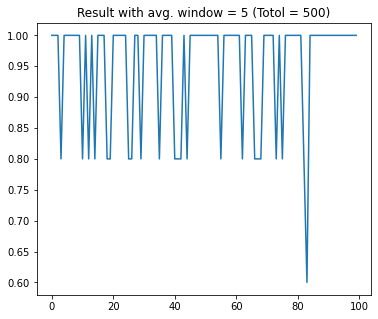

In [29]:
def res_plot(epi_res: List, window: int = 250) -> None:
    results = np.mean(np.array(epi_res).reshape(-1,window), axis=1)
    fig, axes = plt.subplots(figsize=(6, 5))
    axes.plot(results)
    axes.set_title('Result with avg. window = {} (Totol = {})'.format(window, len(epi_res)))
    
epi_res = res_info['res']
res_plot(epi_res, window=5)

# 2 TicTacToe with DQN

In [30]:
# std
import io
import sys
import random
import logging
from collections import namedtuple, deque

# imported
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

- a feedforward neural net with three hidden layers consisting of 128, 256, and 128 neurons
- input: 9 poition x 2 possible states
- output: nine actions

## 2.0 Implementation details

### Setup

In [31]:
BATCH_SIZE = 64
BUFFER_SIZE = 10000
GAMMA = 0.99 # discount factor
TARGET_UPDATE = 500 # update interval
START_LR = 5e-4
EPS_MAX = 0.8
EPS_MIN = 0.1
N_STAR = 20000
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Utility

In [32]:
def grid_to_state(
    grid: np.array, 
    switch: bool = False, 
    vec: bool = True,
) -> np.array:
    """If not switched, 1 and -1 on the grid means X and O, and vice versa"""
    
    state = np.zeros((3, 3, 2))
    
    if not switch:
        state[:, :, 0] = (grid==1).astype(float)
        state[:, :, 1] = (grid==-1).astype(float)
    else:
        state[:, :, 0] = (grid==-1).astype(float)
        state[:, :, 1] = (grid==1).astype(float)
    
    if vec:
        state = state.reshape(1,-1)
    
    return torch.tensor(state, dtype=torch.float)

In [33]:
grid, _, _ = env.reset()
grid, _, _ = env.step(2)
grid, _, _ = env.step(3)
grid, _, _ = env.step(5)
print(grid)
test_state1 = grid_to_state(grid, vec=False)
# print(test_state1[:,:,0], test_state1[:,:,1])
test_state2 = grid_to_state(grid, switch=True, vec=False)
# print(test_state2[:,:,0], test_state2[:,:,1])
assert np.array_equal(test_state1[:,:,0], test_state2[:,:,1])
assert np.array_equal(test_state2[:,:,0], test_state1[:,:,1])

[[ 0.  0.  1.]
 [-1.  0.  1.]
 [ 0.  0.  0.]]


In [34]:
test_state2

tensor([[[0., 0.],
         [0., 0.],
         [0., 1.]],

        [[1., 0.],
         [0., 0.],
         [0., 1.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]])

In [35]:
test_state3 = grid_to_state(grid, switch=True, vec=True)
valid_moves = (test_state3.cpu().numpy().reshape(3,3,2).sum(axis=2).reshape(-1) == 0)
valid_moves

array([ True,  True, False, False,  True, False,  True,  True,  True])

### Replay memory

- `Transition`: a single transition in our environment. It essentially maps (state, action) pairs to their (next_state, reward) result, with the state being the board position (showing -, O, or X)
- `ReplayMemory`: a cyclic buffer of bounded size that holds the transitions observed recently, which could be sampled for selecting a random batch of transitions for training

In [36]:
# ref: https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html#replay-memory
Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))

class ReplayMemory(object):

    def __init__(self, capacity):
        self.memory = deque([],maxlen=capacity)

    def push(self, *args):
        """Save a transition"""
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)
    
    def last(self):
        return self.memory[-1]

    def __len__(self):
        return len(self.memory)

- Example of memory replay buffer

In [37]:
memory = ReplayMemory(100)
for i in range(10):
    action = random.randrange(2)
    reward = random.random()
    if i==9:
        memory.push(i, action, None, reward)
    else:
        memory.push(i, action, i+1, reward)
transitions1 = memory.sample(2)
transitions2 = [memory.last()]
print(transitions1, transitions2)
assert type(transitions1) == type(transitions2)

# unzip as batch
batch1 = Transition(*zip(*transitions1))
batch2 = Transition(*zip(*transitions2))
print("Batch: ", batch1, batch2)

[Transition(state=2, action=1, next_state=3, reward=0.4548298861859761), Transition(state=3, action=0, next_state=4, reward=0.018646542476254302)] [Transition(state=9, action=0, next_state=None, reward=0.978802708205733)]
Batch:  Transition(state=(2, 3), action=(1, 0), next_state=(3, 4), reward=(0.4548298861859761, 0.018646542476254302)) Transition(state=(9,), action=(0,), next_state=(None,), reward=(0.978802708205733,))


In [38]:
non_final_next_states = [s for s in batch2.next_state if s is not None]
non_final_next_states
# if None, report []

[]

### Illegal moves reward (TODO)

In [39]:
R_UNAV = -1
# invalid = env.check_valid(position) == False

### DQN algorithm

- input state $s_t$ by a 3 × 3 × 2 tensor
- 2 hidden layers each with 128 neurons – with ReLu activation functions.
The output layer has 9 neurons (for 9 different actions) with linear activation functions
- 9 neurons (for 9 different actions) with linear activation functions

PS: do not constraint actions to only available actions. However, whenever the agent takes an unavailable action, we end the game and give the agent a negative reward
of value $r_{unav}$ = −1.

In [40]:
class DQN(nn.Module):

    def __init__(self, n_inputs: int = 18, n_outputs: int = 9):
        super(DQN, self).__init__()
        self.i2h = nn.Linear(n_inputs, 128)
        self.hid = nn.Linear(128, 128)
        self.h2o = nn.Linear(128, n_outputs)

    # Called with either one element to determine next action, or a batch
    # during optimization.
    def forward(self, x):
        x = F.relu(self.i2h(x))
        x = F.relu(self.hid(x))
        x = self.h2o(x)
        return x
    
    def act(self, state):
        with torch.no_grad():
            return self.forward(state).max(1)[1].view(1, 1)

In [41]:
def decreasing_exploration(
    n_step: int,
    n_star: int = 20000, 
    e_max: float = 0.8, 
    e_min: float = 0.1, 
):
    return max(e_min, e_max * (1 - n_step/n_star)) 

In [48]:
def empty(grid):
    '''return all empty positions'''
    avail = []
    for i in range(9):
        pos = (int(i / 3), i % 3)
        if grid[pos] == 0:
            avail.append(pos)
    return avail

def random_move(grid):
    """Chose a random move from the available options."""
    avail = empty(grid)
    return avail[random.randint(0, len(avail) - 1)]

def tuple_to_int(action):
    return action[0] * 3 + action[1]

In [57]:
def select_action(
    eps: float,
    policy: nn.Module, 
    grid: np.array, 
    device: torch.device, 
    nr_action: int = 9,
    switch=False,
) -> Tuple[torch.tensor, bool]:
    
    state = grid_to_state(grid, switch=switch).to(device)

    if random.random() > eps:
        return (policy.act(state), state, False)
    else:
        action_tuple = random_move(grid)
        return (torch.tensor(
            [[tuple_to_int(action_tuple)]],
            device=device,
            ),
                state, 
                True
       )
        
#         return (
#             torch.tensor(
#                 [[random.randrange(9)]],
#                 device=device,
#             ),
#             True,
#         )

In [58]:
def optimize_model(
    batch_size: int,
    gamma: float,
    device: torch.device,
    optimizer: optim.Optimizer,
    criterion: torch.nn,
    policy: nn.Module,
    target: nn.Module,
    replay: bool = True,
    memory: ReplayMemory = None,
):
    """Model optimization step, borrow from the Torch DQN tutorial.
    
    Arguments:
        batch_size {int} -- Number of observations to use per batch step
        gamma {float} -- Reward discount factor
        device {torch.device} -- Device
        optimizer {torch.optim.Optimizer} -- Optimizer
        criterion {torch.nn} -- Loss
        policy {nn.Module} -- Policy net
        target {nn.Module} -- Target net
        replay {bool} -- Use replay buffer for not
        memory {ReplayMemory} -- Replay memory
    """
    if replay:
        if len(memory) < batch_size:
            return
        transitions = memory.sample(batch_size)
        # Transpose the batch (see https://stackoverflow.com/a/19343/3343043 for
        # detailed explanation). This converts batch-array of Transitions
        # to Transition of batch-arrays.
    else:
        # update the network by using only the latest transition
        transitions = [memory.last()]
    batch = Transition(*zip(*transitions))

    # Compute a mask of non-final states and concatenate the batch elements
    # (a final state would've been the one after which simulation ended)
    non_final_mask = torch.tensor(
        tuple(map(lambda s: s is not None, batch.next_state)),
        device=device,
        dtype=torch.bool,
    )
    non_final_next_states_ = [s for s in batch.next_state if s is not None]
    # TODO: check correct or not with batch_size = 1
    if len(non_final_next_states_) == 0:
        return
    non_final_next_states = torch.cat(non_final_next_states_)
    state_batch = torch.cat(batch.state)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)

    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken. These are the actions which would've been taken
    # for each batch state according to policy
    state_action_values = policy(state_batch).gather(1, action_batch)

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1)[0].
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    next_state_values = torch.zeros(batch_size, device=device)
    next_state_values[non_final_mask] = target(non_final_next_states).max(1)[0].detach()
    # Compute the expected Q values
    expected_state_action_values = (next_state_values * gamma) + reward_batch

    # Compute Huber loss
    loss = criterion(
        state_action_values, 
        expected_state_action_values.unsqueeze(1)
    )

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    for param in policy.parameters():
        param.grad.data.clamp_(-1, 1)
    optimizer.step()
    
    return loss.detach().numpy()

In [71]:
def fit(
    n_episode: int = 20000,
    batch_size: int = BATCH_SIZE,
    buffer_size: int = BUFFER_SIZE,
    gamma: float = GAMMA,
    target_update: int = TARGET_UPDATE,
    explore: bool = False,
    replay: bool = True,
    n_star: int = N_STAR, 
    e_max: float = EPS_MAX, 
    e_min: float = EPS_MIN, 
    lr: float = START_LR,
    logging_size = 2000,
    seed = None,
    device: torch.device = None, 
    save_ckpt: str = 'policy.pth',
) -> List:

    logging.info("Beginning training on: {}".format(device))
    
    # Network
    policy = DQN(n_inputs = 18, n_outputs = 9).to(device)
    target = DQN(n_inputs = 18, n_outputs = 9).to(device)
    target.load_state_dict(policy.state_dict())
    target.eval()

    # Adam optimizer
    optimizer = optim.Adam(policy.parameters(), lr=lr)
    
    # TODO: scheduler?

    # Huber loss (delte=1 in SmoothL1Loss)
    criterion = nn.SmoothL1Loss()

    # Memory buffer
    if replay:
        memory = ReplayMemory(BUFFER_SIZE)
    else:
        memory = ReplayMemory(9)

    env = TictactoeEnv()
    # state = torch.tensor([], dtype=torch.float).to(device)
    info = {
        "total": 0,
        "illegals": 0,
        "tie_g": 0,
        "win_g": 0,
        "los_g": 0,
        "win_rate": 0.0,
        "eps": 0.0,
        "loss": []
    }
    summaries = []
    losses = []
    rewards = []
    
    # Expert
    expert = OptimalPlayer(epsilon=.5)

    for episode in tqdm(range(n_episode)):
        switch = episode % 2
        if switch:
            player1, player2 = 'O', 'X'
        else:
            player1, player2 = 'X', 'O'
        expert.player = player2
        
        grid, end, _ = env.reset()
        
        if explore:
            eps = decreasing_exploration(episode, n_star, e_max, e_min)
        else:
            eps = e_max
        
        # Take first step by expert
        if env.num_step == 0 and switch:
            move = expert.act(grid)
            grid, end, winner = env.step(move, print_grid=False) 
            
        while not end:
            # Select and perform an action from DQN
            # state = grid_to_state(grid, switch=switch, vec=True).to(device)
            action, state, _ = select_action(eps, policy, grid, device, switch=switch)
            if env.check_valid(action.item()):
                grid, end, winner = env.step(action.item(), print_grid=False)
                reward = env.reward(player=player1)
            else:
                reward = R_UNAV # -1
                end = True
                info["illegals"] += 1
                winner = player2
                # print(episode, "Illegal moves")
                
            if not end:
                move = expert.act(grid)
                grid, end, winner = env.step(move, print_grid=False) 
                # Observe new state
                next_state = grid_to_state(grid, switch=switch, vec=True).to(device)
            else:
                next_state = None
            
            memory.push(state, action, next_state, torch.tensor([reward], device=device))

            loss = optimize_model(
                batch_size=batch_size,
                gamma=gamma,
                device=device,
                optimizer=optimizer,
                criterion=criterion,
                policy=policy,
                target=target,
                replay=replay,
                memory=memory,
            )
            
            losses.append(loss)
            
        if reward != -1:
            final_reward = env.reward(player=player1)
            rewards.append(final_reward)
        else:
            rewards.append(-1)
            
        # update summary
        info['total'] = episode + 1
        if winner == None:
            info['tie_g'] += 1
        elif winner == player1:
            info['win_g'] += 1
        else:
            info['los_g'] += 1
        info['win_rate'] = info['win_g'] / info['total']
        info['eps'] = eps
        # info['loss'] = loss
        summaries.append(info)
        
        
        if episode and ((episode+1) % target_update) == 0:
            target.load_state_dict(policy.state_dict())
        if episode and ((episode+1) % logging_size) == 0:
            # print(info)
            [print(key,':',value) for key, value in info.items()]

    logging.info("Complete")
    torch.save(policy.state_dict(), 'policy.pth')
    logging.info("Save policy as {}!".format(save_ckpt))
    
    return summaries, losses, rewards

In [72]:
logging.basicConfig(level=logging.DEBUG)
summaries, losses, rewards = fit(
    n_episode=10000, 
    target_update=500, 
    logging_size=2500, 
    explore=False, 
    e_max=0.2,
    n_star=10000,
    device=DEVICE,
    replay=True,
    batch_size=32, 
)

INFO:root:Beginning training on: cuda
 25%|██▌       | 2511/10000 [00:27<01:29, 83.43it/s] 

total : 2500
illegals : 75
tie_g : 117
win_g : 892
los_g : 1491
win_rate : 0.3568
eps : 0.2
loss : []


 50%|█████     | 5010/10000 [00:57<00:56, 88.36it/s] 

total : 5000
illegals : 90
tie_g : 210
win_g : 1869
los_g : 2921
win_rate : 0.3738
eps : 0.2
loss : []


 75%|███████▌  | 7513/10000 [01:23<00:27, 92.09it/s] 

total : 7500
illegals : 122
tie_g : 286
win_g : 2726
los_g : 4488
win_rate : 0.36346666666666666
eps : 0.2
loss : []


100%|██████████| 10000/10000 [01:50<00:00, 90.56it/s]
INFO:root:Complete
INFO:root:Save policy as policy.pth!


total : 10000
illegals : 147
tie_g : 371
win_g : 3484
los_g : 6145
win_rate : 0.3484
eps : 0.2
loss : []


In [81]:
from dqn_utils import window_avg_plot

<class 'numpy.ndarray'>
(40,) (40,)


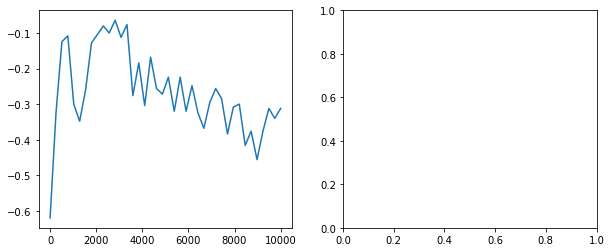

In [82]:
import numpy as np
import matplotlib.pyplot as plt

_, ax = plt.subplots(1,2, figsize=(10, 4))
# rewards_example = np.linspace(-1, 1, 20000) + np.random.rand(20000)
window_avg_plot(axes=ax[0], var=rewards)


INFO:root:Beginning training on: cuda
  6%|▋         | 2516/40000 [00:25<07:06, 87.89it/s] 

total : 2500
illegals : 83
tie_g : 102
win_g : 826
los_g : 1572
win_rate : 0.3304
eps : 0.2
loss : []


 13%|█▎        | 5013/40000 [00:52<06:50, 85.21it/s] 

total : 5000
illegals : 102
tie_g : 176
win_g : 1710
los_g : 3114
win_rate : 0.342
eps : 0.2
loss : []


 19%|█▉        | 7517/40000 [01:23<06:23, 84.69it/s] 

total : 7500
illegals : 134
tie_g : 238
win_g : 2458
los_g : 4804
win_rate : 0.3277333333333333
eps : 0.2
loss : []


 25%|██▌       | 10015/40000 [01:52<05:28, 91.34it/s]

total : 10000
illegals : 192
tie_g : 351
win_g : 3099
los_g : 6550
win_rate : 0.3099
eps : 0.2
loss : []


 31%|███▏      | 12513/40000 [02:21<06:14, 73.48it/s]

total : 12500
illegals : 338
tie_g : 520
win_g : 3706
los_g : 8274
win_rate : 0.29648
eps : 0.2
loss : []


 38%|███▊      | 15015/40000 [02:51<04:34, 91.04it/s]

total : 15000
illegals : 603
tie_g : 697
win_g : 4203
los_g : 10100
win_rate : 0.2802
eps : 0.2
loss : []


 44%|████▍     | 17512/40000 [03:20<05:13, 71.82it/s]

total : 17500
illegals : 797
tie_g : 844
win_g : 4699
los_g : 11957
win_rate : 0.2685142857142857
eps : 0.2
loss : []


 50%|█████     | 20017/40000 [03:51<03:38, 91.25it/s]

total : 20000
illegals : 1056
tie_g : 1008
win_g : 5186
los_g : 13806
win_rate : 0.2593
eps : 0.2
loss : []


 56%|█████▋    | 22507/40000 [04:21<03:29, 83.50it/s] 

total : 22500
illegals : 1304
tie_g : 1188
win_g : 5685
los_g : 15627
win_rate : 0.25266666666666665
eps : 0.2
loss : []


 63%|██████▎   | 25013/40000 [04:52<02:42, 92.03it/s]

total : 25000
illegals : 1584
tie_g : 1383
win_g : 6211
los_g : 17406
win_rate : 0.24844
eps : 0.2
loss : []


 69%|██████▉   | 27507/40000 [05:22<03:09, 65.86it/s]

total : 27500
illegals : 1877
tie_g : 1575
win_g : 6719
los_g : 19206
win_rate : 0.24432727272727273
eps : 0.2
loss : []


 75%|███████▌  | 30010/40000 [05:55<02:05, 79.67it/s]

total : 30000
illegals : 2163
tie_g : 1757
win_g : 7182
los_g : 21061
win_rate : 0.2394
eps : 0.2
loss : []


 81%|████████▏ | 32518/40000 [06:25<01:21, 92.00it/s] 

total : 32500
illegals : 2423
tie_g : 1964
win_g : 7626
los_g : 22910
win_rate : 0.23464615384615384
eps : 0.2
loss : []


 88%|████████▊ | 35011/40000 [06:52<00:56, 88.44it/s] 

total : 35000
illegals : 2750
tie_g : 2118
win_g : 8119
los_g : 24763
win_rate : 0.23197142857142858
eps : 0.2
loss : []


 94%|█████████▍| 37512/40000 [07:20<00:26, 94.41it/s]

total : 37500
illegals : 3028
tie_g : 2309
win_g : 8630
los_g : 26561
win_rate : 0.23013333333333333
eps : 0.2
loss : []


100%|██████████| 40000/40000 [07:48<00:00, 85.38it/s] 
INFO:root:Complete
INFO:root:Save policy as policy.pth!


total : 40000
illegals : 3343
tie_g : 2500
win_g : 9108
los_g : 28392
win_rate : 0.2277
eps : 0.2
loss : []
<class 'numpy.ndarray'>
(160,) (160,)


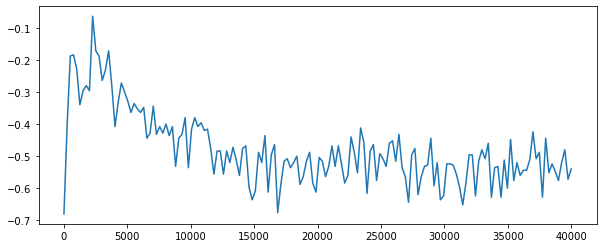

In [83]:
logging.basicConfig(level=logging.DEBUG)
summaries, losses, rewards = fit(
    n_episode=40000, 
    target_update=250, 
    logging_size=2500, 
    explore=False, 
    e_max=0.2,
    n_star=10000,
    device=DEVICE,
    replay=True,
    batch_size=32, 
)
_, ax2 = plt.subplots(figsize=(10, 4))
# rewards_example = np.linspace(-1, 1, 20000) + np.random.rand(20000)
window_avg_plot(axes=ax2, var=rewards)

In [118]:
# loss_history = [info['loss'] for info in summary]
# res_plot(loss_history, window=1)

In [62]:
class DQNPlayer():
    def __init__(self, device: torch.device, player='X'):
        self.player = player # 'X' or 'O'
        self.device = device
        self.model = DQN(n_inputs=18, n_outputs=9).to(self.device)
        
    def load_model(self, path: str):
        model_state_dict = torch.load(path, map_location=self.device)
        self.model.load_state_dict(model_state_dict)
        self.model.eval()

    def act(self, grid: np.array):
        if self.player == 'X':
            switch = False
        else:
            switch = True
        state = grid_to_state(grid, switch=switch, vec=True).to(self.device)
        with torch.no_grad():
            pred = F.softmax(self.model.forward(state), dim=0).cpu().numpy()
            valid_moves = (state.cpu().numpy().reshape(3,3,2).sum(axis=2).reshape(-1) == 0)
            move = (valid_moves * pred).argmax()
            return int(move)

In [63]:
player_dqn = DQNPlayer(device=DEVICE)
player_dqn.load_model('policy.pth')
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in player_dqn.model.state_dict():
    print(param_tensor, "\t", player_dqn.model.state_dict()[param_tensor].size())

Model's state_dict:
i2h.weight 	 torch.Size([128, 18])
i2h.bias 	 torch.Size([128])
hid.weight 	 torch.Size([128, 128])
hid.bias 	 torch.Size([128])
h2o.weight 	 torch.Size([9, 128])
h2o.bias 	 torch.Size([9])


In [64]:
metric_dict = {'opt': 0.0, 'rand': 1.0}
for (mode, epsilon) in metric_dict.items():
    # player_opt = OptimalPlayer(epsilon=0.)
    player_baseline = OptimalPlayer(epsilon=epsilon)
    res_info = eval(player_dqn, player_baseline)
    
    print("# Eval with Opt({})".format(epsilon))
    print('M{} = {}, Draw rate = {}'.format(mode, res_info['metric'], res_info['draw_rate']))

100%|██████████| 500/500 [00:01<00:00, 311.76it/s]


# Eval with Opt(0.0)
Mopt = -1.0, Draw rate = 0.0


100%|██████████| 500/500 [00:00<00:00, 673.34it/s]

# Eval with Opt(1.0)
Mrand = -0.172, Draw rate = 0.04


In [67]:
player_dqn = DQNPlayer(device=DEVICE)
player_dqn.load_model('policy.pth')
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in player_dqn.model.state_dict():
    print(param_tensor, "\t", player_dqn.model.state_dict()[param_tensor].size())

metric_dict = {'opt': 0.0, 'rand': 1.0}
for (mode, epsilon) in metric_dict.items():
    # player_opt = OptimalPlayer(epsilon=0.)
    player_baseline = OptimalPlayer(epsilon=epsilon)
    res_info = eval(player_dqn, player_baseline)
    
    print("# Eval with Opt({})".format(epsilon))
    print('M{} = {}, Draw rate = {}'.format(mode, res_info['metric'], res_info['draw_rate']))

Model's state_dict:
i2h.weight 	 torch.Size([128, 18])
i2h.bias 	 torch.Size([128])
hid.weight 	 torch.Size([128, 128])
hid.bias 	 torch.Size([128])
h2o.weight 	 torch.Size([9, 128])
h2o.bias 	 torch.Size([9])


100%|██████████| 500/500 [00:01<00:00, 318.00it/s]


# Eval with Opt(0.0)
Mopt = -1.0, Draw rate = 0.0


100%|██████████| 500/500 [00:00<00:00, 740.70it/s]

# Eval with Opt(1.0)
Mrand = -0.034, Draw rate = 0.03


In [ ]:
def window_avg_plot(arr: np.array, window_sz: int=250) -> np.array:
    """
    Computes the average over successive windows of an array.
    arr must be a 1D array whose length is a multiple of the
    window length.
    """
    result = []
    for win_start in range(0, arr.shape[0], window_sz):
        result.append(np.mean(arr[win_start:win_start + window_sz]))
    return result

## 2.1 Learning from experts

### Q11 Standard training with fixed  $\epsilon$ 

### Q12 Training without the replay buffer and with a batch size of 1

### Q13 Training with decreasing $\epsilon$ given different values of $n*$

### Q14 Visualizing $M_{opt}$ and $M_{rand}$ over time

### Q15 Reporting best results

## 2.2 Learning by self-practice

### Q16 Training with different fixed  $\epsilon$

### Q17 Training with decreasing  $\epsilon$ given different values of $n*$

### Q18 Reporting best results

### Q19 Visualizing Q values